In [1]:
# importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the csv file
df=pd.read_csv('bank-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

#### Independent Variables: 17
     Categorical Variable:9 
          i) job: 7 classes
         ii) marital: 3 classes
        iii) education: 4 classes
         iv) default: 2 classes
         v) housing: 2 classes
        vi) loan: 2 classes
       vii) contact: 3 classes
      viii) month: 12 classes
        ix) poutcome: 4 classes
        
     Numerical Variable:8
         i) age: [18,95]
        ii) balance: [-8019, 102127]
       iii) day: [1, 31]
        iv) duration: [0, 4918]
         v) campaign: [1, 63]
        vi) pdays: [-1, 871]
       vii) previous: [0, 275]

#### Response Variables (Categorical): y (yes or no)

In [330]:
# five point summary for the continuous variable
x=df.describe()

In [332]:
x.to_csv('statistics.csv')

### Important functions for making the visualization (Bar plot, Pie Chart, Histogram)

In [175]:
# Some important functions for making the chart:
def pie_chart(categorical_feature):
    labels=list(df[categorical_feature].unique())
    values=list(df[categorical_feature].value_counts())
    plt.figure(figsize=(3,3),dpi=100)
    #ig,ax=plt.subplots()
    plt.pie(values,labels=labels,autopct='%1.0f%%')
    plt.xlabel('Pie chart for the feature: {}'.format(categorical_feature))

In [165]:
# Bar plot
def bar_plot(categorical_feature):
    labels=list(df[categorical_feature].unique())
    values=list(df[categorical_feature].value_counts(normalize=True)*100)
    bar_colors = ['tab:blue','tab:orange']
    plt.figure(figsize=(8, 4), dpi=100)
    #fig,ax=plt.subplots()
    plt.bar(labels,values,color=bar_colors)
    plt.xlabel('Pie chart for the feature: {}'.format(categorical_feature))

Text(0, 0.5, 'job')

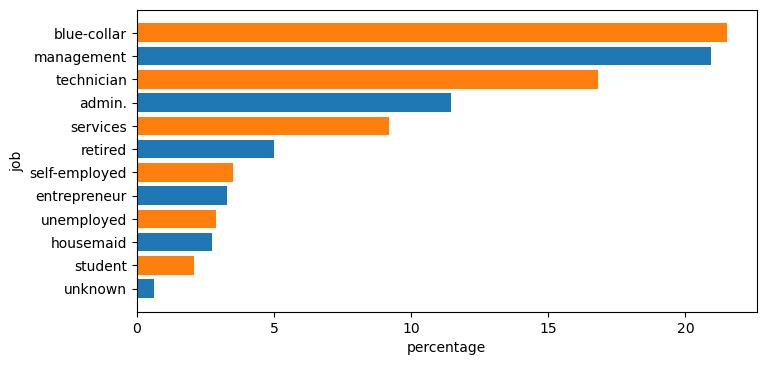

In [487]:
categorical_feature='job'
counts=df[categorical_feature].value_counts(normalize=True).sort_values()*100
labels=counts.index
values=list(counts)
bar_colors = ['tab:blue','tab:orange']
plt.figure(figsize=(8, 4), dpi=100)
#fig,ax=plt.subplots()
plt.barh(labels,values,color=bar_colors)
plt.xlabel('percentage')
plt.ylabel(categorical_feature)

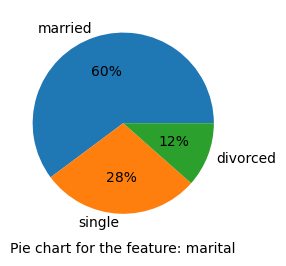

In [477]:
pie_chart('marital')

In [83]:
list(df['y'].value_counts())

[39922, 5289]

### Check for 

In [69]:
# Check for data 
df['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

##### Comment: 
     From above it is clear that , subsription rate is 12%.
      i) Data is imbalanced

**One question arises: Does imbalance of class in response variable have impact on the training for Classification.**

Text(0, 0.5, 'frequency')

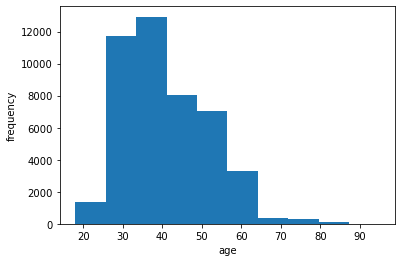

In [11]:
# General observation about age
plt.hist(df['age'])
plt.xlabel('age')
plt.ylabel('frequency')

<AxesSubplot:xlabel='age', ylabel='education'>

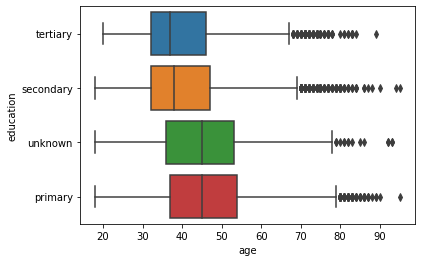

In [130]:
# box plot
sns.boxplot(data=df,x='age',y='education')

<AxesSubplot:xlabel='balance', ylabel='Count'>

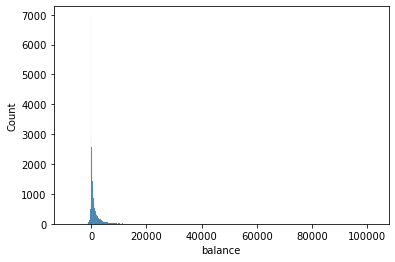

In [31]:
# General observation about age
sns.histplot(df['balance'])
#plt.xlabel('balance')
#plt.ylabel('frequency')

<AxesSubplot:xlabel='balance'>

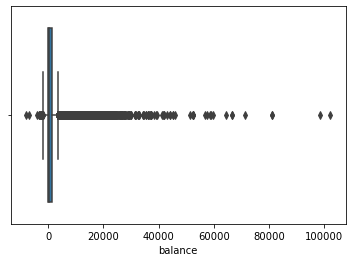

In [32]:

sns.histplot(df['balance'])


C:\Users\ahmad106\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ahmad106\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='balance', ylabel='Count'>

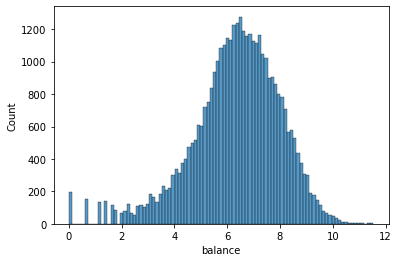

In [33]:
# log transformation
x=np.log(df['balance'])
sns.histplot(x)

<AxesSubplot:xlabel='day', ylabel='Count'>

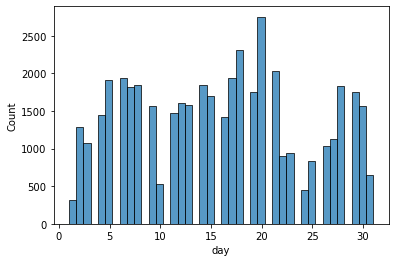

In [34]:
sns.histplot(df['day'])

C:\Users\ahmad106\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'day')

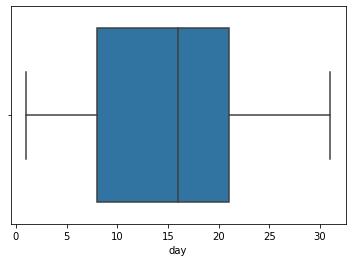

In [37]:
sns.boxplot(df['day'])
plt.xlabel('day')

Text(0.5, 0, 'duration')

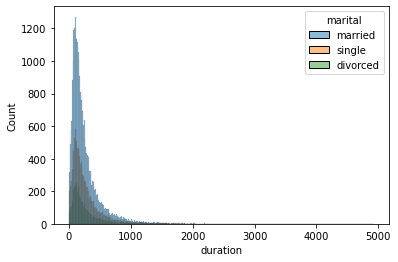

In [42]:
sns.histplot(data=df,x='duration',hue='marital')
plt.xlabel('duration')

Text(0.5, 0, 'duration')

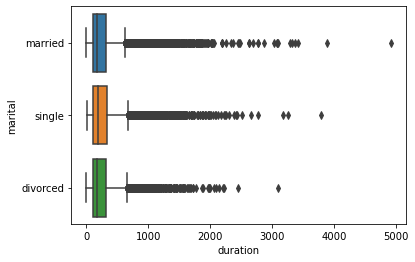

In [43]:
sns.boxplot(data=df,x='duration',y='marital')
plt.xlabel('duration')

Text(0.5, 0, 'campaign')

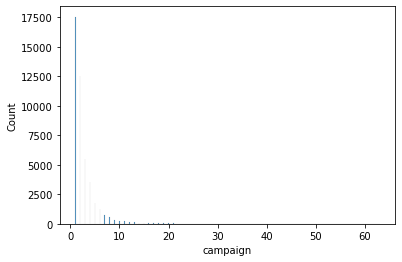

In [45]:
sns.histplot(data=df,x='campaign')
plt.xlabel('campaign')

Text(0.5, 0, 'campaign')

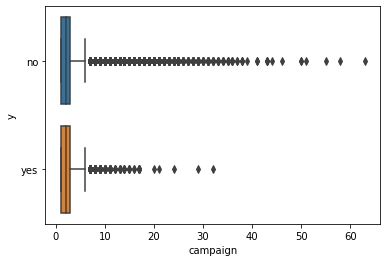

In [51]:
sns.boxplot(data=df,x='campaign',y='y')
plt.xlabel('campaign')

Text(0.5, 0, 'pdays')

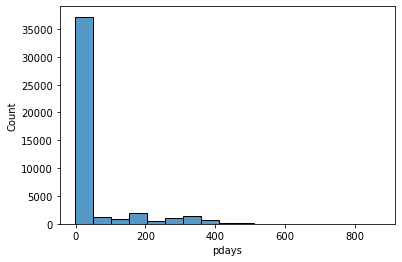

In [50]:
sns.histplot(data=df,x='pdays')
plt.xlabel('pdays')

<AxesSubplot:>

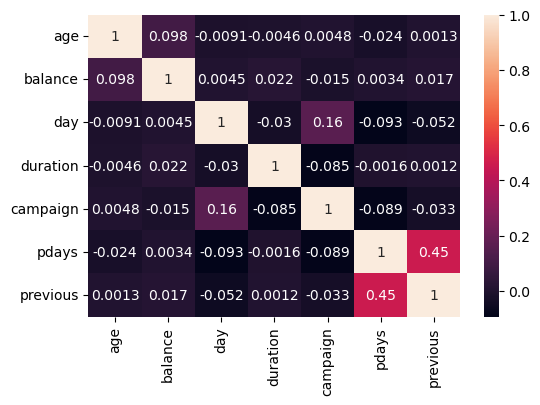

In [9]:
# Correlation matrix
plt.figure(figsize=(6, 4), dpi=100)
x=df[['age','balance','day','duration','campaign','pdays','previous']]
sns.heatmap(x.corr(), annot=True)

In [ ]:
# Chisquare:
from scipy.stats import chisquare


C:\Users\ahmad106\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ahmad106\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


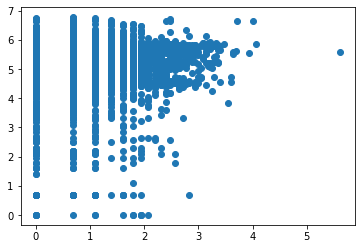

In [132]:
#
plt.scatter(np.log(df['previous']),np.log(df['pdays']))

<AxesSubplot:xlabel='previous', ylabel='pdays'>

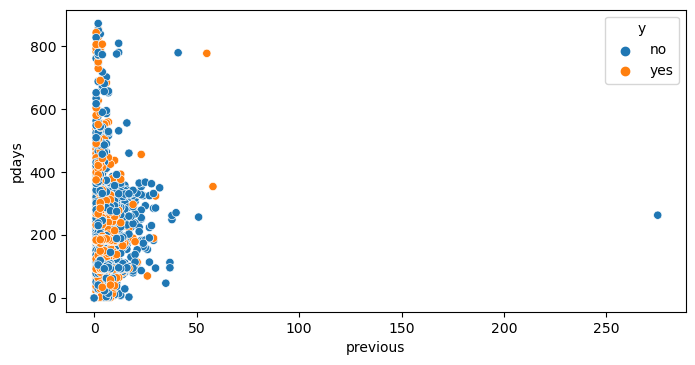

In [196]:
#plt.scatter(df['previous'],df['pdays'])
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=df,x='previous',y='pdays',hue='y')


Text(2000, 16, 'High subsription rate when number of contact<15')

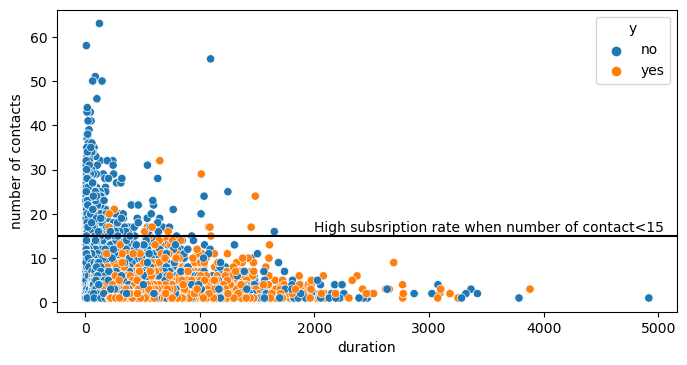

In [481]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=df,x='duration',y='campaign',hue='y')
plt.axhline(y=15,color='black')
plt.ylabel('number of contacts')
plt.text(2000,16, 'High subsription rate when number of contact<15', fontsize =10)


In [199]:
values

[24.59822272641331,
 15.882019285309132,
 13.386273397617698,
 11.930421629797694,
 9.75609756097561,
 6.976744186046512,
 5.086027604462092,
 3.8192474948005297,
 3.5356400075628667,
 2.3255813953488373,
 2.0608810739270185,
 0.642843637738703]

In [212]:
count=new_df[categorical_feature].value_counts(normalize=True).sort_values()*100
count

unknown           0.642844
housemaid         2.060881
entrepreneur      2.325581
self-employed     3.535640
unemployed        3.819247
student           5.086028
services          6.976744
retired           9.756098
admin.           11.930422
blue-collar      13.386273
technician       15.882019
management       24.598223
Name: job, dtype: float64

In [421]:
categorical_feature='job'
new_df=df[df['y']=='yes']
count=new_df[categorical_feature].value_counts().sort_values()
count

unknown            34
housemaid         109
entrepreneur      123
self-employed     187
unemployed        202
student           269
services          369
retired           516
admin.            631
blue-collar       708
technician        840
management       1301
Name: job, dtype: int64

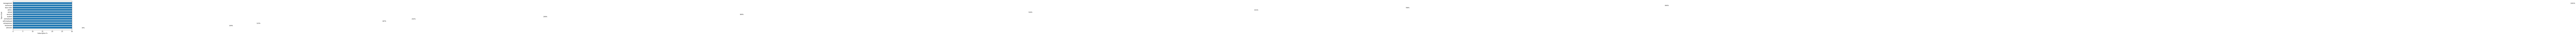

In [420]:
# Subsription rate by Job
categorical_feature='job'
new_df=df[df['y']=='yes']
count=new_df[categorical_feature].value_counts().sort_values()
labels=list(count.index)
values=list(count)
bar_colors = ['tab:blue']
plt.figure(figsize=(8, 4), dpi=100)
#fig,ax=plt.subplots()
plt.barh(labels,values,color=bar_colors)
plt.xlabel('Subscription %')
plt.ylabel('Type of Job')
plt.xlim(0,30)
j=0
for i in values:
    plt.text(int(i)+1,j-0.25,'{}%'.format(round(i,2)), fontsize =10)
    j=j+1
plt.show()

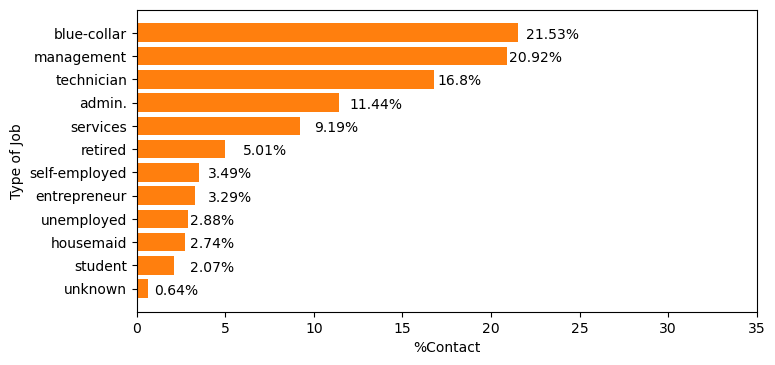

In [476]:
# Subsription rate by Job
categorical_feature='job'
new_df=df
count=new_df[categorical_feature].value_counts(normalize=True).sort_values()*100
labels=list(count.index)
values=list(count)
bar_colors = ['tab:orange']
plt.figure(figsize=(8, 4), dpi=100)
#fig,ax=plt.subplots()
plt.barh(labels,values,color=bar_colors)
plt.xlabel('%Contact')
plt.ylabel('Type of Job')
plt.xlim(0,35)
j=0
for i in values:
    plt.text(int(i)+1,j-0.25,'{}%'.format(round(i,2)), fontsize =10)
    j=j+1

In [454]:
subscription_count=df[df['y']=='yes']['job'].value_counts()
overall_count=df['job'].value_counts()
cols=list(subscription_count.index)

In [448]:
overall_count['blue-collar']

9732

In [431]:
overall_count

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [466]:
job_wise_subscribed=[]
job_wise_overall=[]
labels=[]
value=[]
n=len(df)
for i in cols:
    job_wise_subscribed.append((subscription_count[i]*100/overall_count[i],i))
    job_wise_overall.append((overall_count[i]*100/n,i))
job_wise_subscribed.sort()
for i in job_wise_subscribed:
    print(i)
    labels.append(i[1])
    value.append(round(i[0],2))

(7.274969173859433, 'blue-collar')
(8.271687962340282, 'entrepreneur')
(8.790322580645162, 'housemaid')
(8.883004333172845, 'services')
(11.056996182703699, 'technician')
(11.805555555555555, 'unknown')
(11.842938568714375, 'self-employed')
(12.202668729452718, 'admin.')
(13.755550856417848, 'management')
(15.502686108979278, 'unemployed')
(22.791519434628974, 'retired')
(28.678038379530918, 'student')


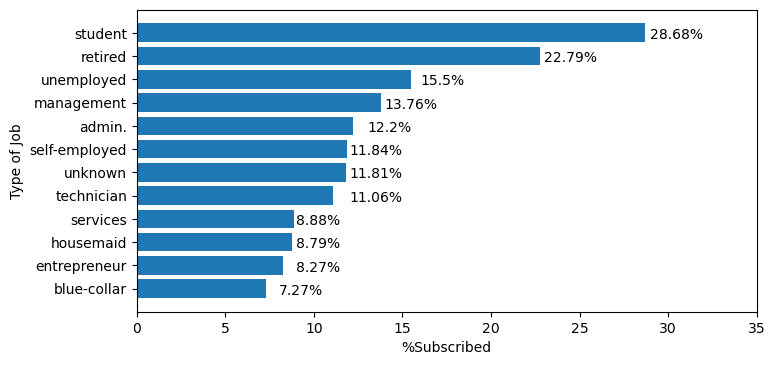

In [475]:
# Subsription rate by Job
bar_colors = ['tab:blue']
plt.figure(figsize=(8, 4), dpi=100)
#fig,ax=plt.subplots()
plt.barh(labels,value,color=bar_colors)
plt.xlabel('%Subscribed')
plt.ylabel('Type of Job')
plt.xlim(0,35)
j=0
for i in value:
    plt.text(int(i)+1,j-0.25,'{}%'.format(i, fontsize =10))
    j=j+1

In [447]:
job_wise_overall.sort()
for i in job_wise_subscribed:
    print(i)
    labels.append(i[1])
    value.append(round(i[0],2))

[(7.274969173859433, 'blue-collar'),
 (8.271687962340282, 'entrepreneur'),
 (8.790322580645162, 'housemaid'),
 (8.883004333172845, 'services'),
 (11.056996182703699, 'technician'),
 (11.805555555555555, 'unknown'),
 (11.842938568714375, 'self-employed'),
 (12.202668729452718, 'admin.'),
 (13.755550856417848, 'management'),
 (15.502686108979278, 'unemployed'),
 (22.791519434628974, 'retired'),
 (28.678038379530918, 'student')]

In [457]:
labels

['blue-collar',
 'entrepreneur',
 'housemaid',
 'services',
 'technician',
 'unknown',
 'self-employed',
 'admin.',
 'management',
 'unemployed',
 'retired',
 'student']

In [298]:
subscription_count=df[df['y']=='yes']['month'].value_counts()
overall_count=df['month'].value_counts()
month=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

In [299]:
month_wise_subscribed=[]
month_wise_overall=[]
n=len(df)
for i in month:
    month_wise_subscribed.append(subscription_count[i]*100/overall_count[i])
    month_wise_overall.append(overall_count[i]*100/n)

Text(0, 0.5, 'Percentage')

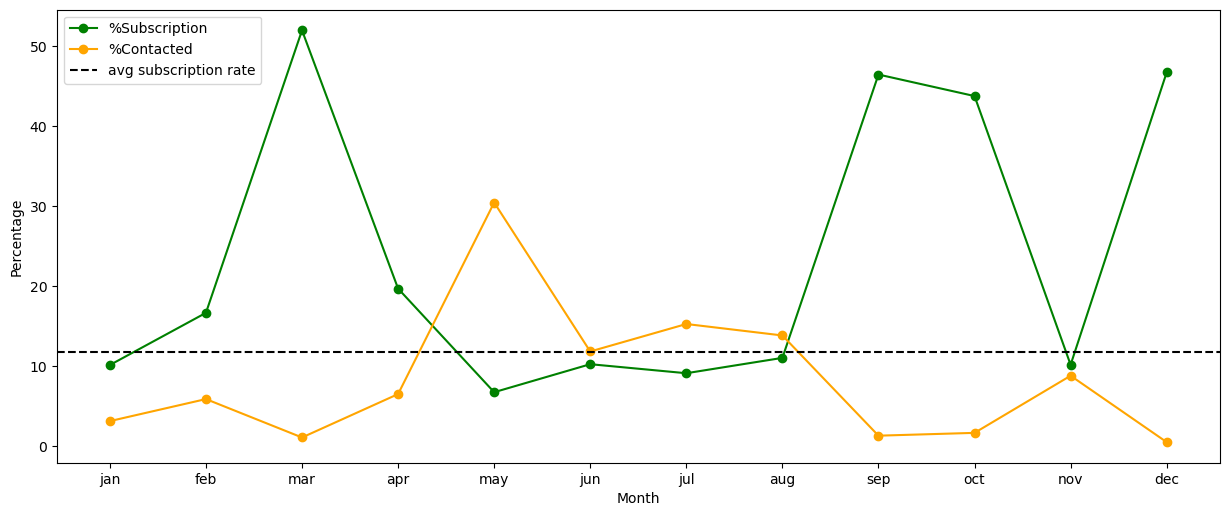

In [326]:
a=len(df[df['y']=='yes'])*100/len(df)
plt.figure(figsize=(15, 6), dpi=100)
plt.plot(month,month_wise_subscribed,color='green',marker='o')
plt.plot(month,month_wise_overall,color='orange',marker='o')
plt.axhline(y=a,color='black',linestyle='dashed')
plt.legend(('%Subscription','%Contacted','avg subscription rate'))
plt.xlabel('Month')
plt.ylabel('Percentage')

In [343]:
df.groupby(['default','loan']).count()

age    job  marital  education  balance  housing  contact  \
default loan                                                                
no      no    37453  37453    37453      37453    37453    37453    37453   
        yes    6943   6943     6943       6943     6943     6943     6943   
yes     no      514    514      514        514      514      514      514   
        yes     301    301      301        301      301      301      301   

                day  month  duration  campaign  pdays  previous  poutcome  \
default loan                                                                
no      no    37453  37453     37453     37453  37453     37453     37453   
        yes    6943   6943      6943      6943   6943      6943      6943   
yes     no      514    514       514       514    514       514       514   
        yes     301    301       301       301    301       301       301   

                  y  
default loan         
no      no    37453  
        yes    6943  
yes     no      514  
        yes     301

### Chisquare Test

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
import scipy.stats as stats

In [ ]:
tab=pd.crosstab(df['default'],df['loan'],margins=True)
tab.columns=['No','Yes','row_counts']
tab.index=['No','Yes','col_counts']
observed=tab.iloc[0:2,0:2]
observed
n=len(df)
expected=np.outer(tab['row_counts'][0:2],tab.loc['col_counts'][0:2])/n
expected
expected=pd.DataFrame(expected)
expected.columns=['No','Yes']
expected.index=['No','Yes']
expected
chisquare_stat=((observed-expected)**2/expected).sum().sum()
chisquare_stat
tcrit=stats.chi2.ppf(q=0.95, df=1)
tcrit
p_value=1-stats.chi2.cdf(x=chisquare_stat,df=1)

In [10]:
tab=pd.crosstab(df['default'],df['loan'],margins=True)

In [11]:
tab

loan,no,yes,All
default,,,
no,37453,6943,44396
yes,514,301,815
All,37967,7244,45211


In [361]:
tab.columns=['No','Yes','row_counts']
tab.index=['No','Yes','col_counts']
tab

,No,Yes,row_counts
No,37453,6943,44396
Yes,514,301,815
col_counts,37967,7244,45211


In [348]:
observed=tab.iloc[0:2,0:2]
observed

,No,Yes
No,37453,6943
Yes,514,301


In [363]:
n=len(df)
expected=np.outer(tab['row_counts'][0:2],tab.loc['col_counts'][0:2])/n
expected

array([[37282.58459225,  7113.41540775],
       [  684.41540775,   130.58459225]])

In [364]:
expected=pd.DataFrame(expected)
expected.columns=['No','Yes']
expected.index=['No','Yes']
expected

,No,Yes
No,37282.584592,7113.415408
Yes,684.415408,130.584592


In [365]:
chisquare_stat=((observed-expected)**2/expected).sum().sum()

In [366]:
chisquare_stat

269.689401785226

In [488]:
tcrit=stats.chi2.ppf(q=0.95, df=1)
tcrit

3.841458820694124

In [494]:
p_value=stats.chi2.cdf(x=chisquare_stat,df=1)

In [495]:
np.log(p_value)

0.0

In [417]:
z=df['poutcome'].value_counts(normalize=True).sort_index()
z

failure    0.108403
other      0.040698
success    0.033421
unknown    0.817478
Name: poutcome, dtype: float64

In [414]:
cols=['default','housing','loan','y']

In [415]:
data.append(list(z))

In [416]:
data

[[0.9819734135497998, 0.018026586450200173],
 [0.44416181902634316, 0.5558381809736569],
 [0.839773506447546, 0.16022649355245405],
 [0.8830151954170445, 0.11698480458295547]]

In [397]:
data_f=pd.DataFrame()

{'housing': {'yes': 55.583818097365686, 'no': 44.416181902634314},
 'default': {'yes': 98.19734135497998, 'no': 1.8026586450200173}}

In [ ]:
#default: 2 classes
   #  v) housing: 2 classes
    #vi) loan: 2 classes

In [22]:
tab=pd.crosstab(df['default'],df['housing'],margins=True)
tab.columns=['No','Yes','row_counts']
tab.index=['No','Yes','col_counts']
observed=tab.iloc[0:2,0:2]
observed
n=len(df)
expected=np.outer(tab['row_counts'][0:2],tab.loc['col_counts'][0:2])/n
expected
expected=pd.DataFrame(expected)
expected.columns=['No','Yes']
expected.index=['No','Yes']
expected
chisquare_stat=((observed-expected)**2/expected).sum().sum()
chisquare_stat


1.6413065178903097

In [23]:
tcrit=stats.chi2.ppf(q=0.95, df=1)
tcrit


3.841458820694124

In [24]:
p_value=1-stats.chi2.cdf(x=chisquare_stat,df=1)
p_value

0.20014630290508817

In [25]:
tab=pd.crosstab(df['housing'],df['loan'],margins=True)
tab

loan,no,yes,All
housing,,,
no,17204,2877,20081
yes,20763,4367,25130
All,37967,7244,45211


In [26]:
expected

,No,Yes
No,19719.008117,24676.991883
Yes,361.991883,453.008117


In [48]:
tab=pd.crosstab(df['job'],df['education'],margins=True)
tab.columns=['Primary','Secondary','tertiary','unknown','row_counts']
tab.index=['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown','col_counts']
observed=tab.iloc[0:12,0:4]
observed
n=len(df)
expected=np.outer(tab['row_counts'][0:12],tab.loc['col_counts'][0:4])/n
expected
expected=pd.DataFrame(expected)
expected.columns=['Primary','Secondary','tertiary','unknown']
expected.index=['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown']
expected
chisquare_stat=((observed-expected)**2/expected).sum().sum()
chisquare_stat

28483.1364531764

In [49]:
tab

,Primary,Secondary,tertiary,unknown,row_counts
admin.,209,4219,572,171,5171
blue-collar,3758,5371,149,454,9732
entrepreneur,183,542,686,76,1487
housemaid,627,395,173,45,1240
management,294,1121,7801,242,9458
retired,795,984,366,119,2264
self-employed,130,577,833,39,1579
services,345,3457,202,150,4154
student,44,508,223,163,938
technician,158,5229,1968,242,7597


In [37]:
x=df['job'].unique()
x

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [50]:
tcrit=stats.chi2.ppf(q=0.95, df=1)
tcrit

3.841458820694124

In [51]:
p_value=1-stats.chi2.cdf(x=chisquare_stat,df=1)
p_value 

0.0

## Feature Engineering 

In [52]:
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [400]:
from sklearn.model_selection import train_test_split

In [439]:
X=df.drop('y',axis=1)
y=df['y']

In [440]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [441]:
y_train.value_counts(normalize=True)

no     0.883002
yes    0.116998
Name: y, dtype: float64

In [442]:
from sklearn.preprocessing import OneHotEncoder

In [443]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True,drop=True)

In [444]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,29,housemaid,single,tertiary,no,453,no,no,cellular,13,aug,126,2,-1,0,unknown
1,55,services,married,secondary,no,0,no,no,cellular,22,oct,102,1,106,1,failure
2,56,services,divorced,secondary,no,935,no,no,cellular,2,jun,136,1,96,3,failure
3,47,housemaid,single,tertiary,no,3232,no,no,telephone,6,oct,541,1,204,3,failure
4,39,technician,married,tertiary,no,508,no,no,cellular,2,nov,154,3,-1,0,unknown


In [445]:
for i in category:
    X_train[i]=X_train[i].astype('category')

In [446]:
enc = OneHotEncoder(handle_unknown='ignore',drop='first')
category=['job','marital','education'] #,'default','housing','loan','contact','month','poutcome']
enc.fit(X_train[category])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [447]:
new_df=pd.DataFrame(enc.transform(X_train[category]).toarray())
new_df.columns=enc.get_feature_names_out()

In [448]:
#numerical_feature=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features=['job','marital','education','default','housing','loan','contact','month','poutcome']
num_features=['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
features_drop=categorical_features+num_features
features_drop

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [436]:
features_drop

In [449]:
X_train=pd.concat([X_train, new_df], axis=1).drop(features_drop, axis=1)

In [450]:
y_train=[1 if i=='yes' else 0 for i in y_train.values]

In [451]:
new_df=pd.DataFrame(enc.transform(X_test[category]).toarray())
new_df.columns=enc.get_feature_names_out()
X_test=pd.concat([X_test, new_df], axis=1).drop(features_drop, axis=1)
y_test=[1 if i=='yes' else 0 for i in y_test.values]

In [452]:
X_train.columns

Index(['age', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown'],
      dtype='object')

## Training Logistic Regression Model

In [453]:
from sklearn.linear_model import LogisticRegression

In [454]:
lr=LogisticRegression(penalty='l2',class_weight=None,random_state=50,max_iter=1000,n_jobs=-1)

In [455]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=50)

In [456]:
lr.score(X_train,y_train)

0.8830015516159916

In [457]:
lr.intercept_

array([-2.82114332])

In [458]:
lr.coef_

array([[ 0.01261031, -0.36825601, -0.46533952, -0.16270564, -0.10782631,
         0.64649515, -0.13201402, -0.27030771,  0.9095962 , -0.18097127,
         0.31643406, -0.24064157, -0.11509179,  0.34277878,  0.22923693,
         0.59220578,  0.30764464]])

In [459]:
lr.feature_names_in_

array(['age', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown'],
      dtype=object)

In [483]:
##Test Accuracy
lr.score(X_test,y_test)

0.8830428954423593

In [484]:
y_pred=lr.predict(X_test)

In [485]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn:{},fp:{},fn:{},tp:{}'.format(tn,fp,fn,tp))

tn:13175,fp:0,fn:1745,tp:0


In [486]:
confusion_matrix(y_test,y_pred)

array([[13175,     0],
       [ 1745,     0]], dtype=int64)

In [487]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13175
           1       0.00      0.00      0.00      1745

    accuracy                           0.88     14920
   macro avg       0.44      0.50      0.47     14920
weighted avg       0.78      0.88      0.83     14920



C:\Users\ahmad106\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad106\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad106\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [488]:
y_prob=lr.predict_proba(X_test)

In [489]:
y_prob[1]

array([0.87288933, 0.12711067])

In [490]:
def prob(cutoff,y_prob):
    y_p=[]
    for i in y_prob:
        if i[1]>=cutoff:
            y_p.append(1)
        else:
            y_p.append(0)
    return y_p

In [503]:
cutoff=0.1
y_pred=prob(cutoff,y_prob)

In [504]:
confusion_matrix(y_test,y_pred)

array([[6008, 7167],
       [ 494, 1251]], dtype=int64)

In [505]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.46      0.61     13175
           1       0.15      0.72      0.25      1745

    accuracy                           0.49     14920
   macro avg       0.54      0.59      0.43     14920
weighted avg       0.83      0.49      0.57     14920

